In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
#df = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
#tmp = pd.concat([df, pd.get_dummies(df['Pawpularity'])], axis=1)
#aaa = tmp.corr()
#tmp = pd.DataFrame([aaa[i].head(df.shape[1] - 1) for i in range(1, 101)])
#tmp.abs().max()

In [3]:
#np.load('train_df_prev_path.npy')

In [4]:
#df = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
#df['path'] = '../input/petfinder-adoption-prediction/train_images/' + df['PetID'] + '-1.jpg'
#tmp = df[~df['path'].isin(np.load('train_df_prev_path.npy'))]
#import os
#tmp = tmp[tmp['path'].map(os.path.exists)]

In [5]:
'''
import os
from PIL import Image
import imagehash
from tqdm.auto import tqdm
df1 = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
df1['path'] = '../input/petfinder-adoption-prediction/train_images/' + df1['PetID'] + '-1.jpg'
df1 = df1[df1['path'].map(os.path.exists)]

df2 = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
df2['path'] = df2['Id'].map(lambda x:str(f'../input/petfinder-pawpularity-score/train/{x}.jpg'))

df1['hash'] = [imagehash.average_hash(Image.open(x))
                    for x in tqdm(df1['path'].values)]
df2['hash'] = [imagehash.average_hash(Image.open(x))
                    for x in tqdm(df2['path'].values)]
#train_df_prev['hash'] = [imagehash.average_hash(Image.open(x))
#                    for x in tqdm(train_df_prev['path'].values)]
'''
pass


In [6]:
#np.save('isin_prev.npy', df2[df2['hash'].isin(df1['hash'])].path.unique())

In [7]:
#hashes = {x: imagehash.average_hash(Image.open(x)) 
# for x in tqdm(glob.glob('../input/petfinder-adoption-prediction/train_images/*jpg'))}

In [8]:
#df_all = pd.Series(hashes).to_frame('hash').reset_index()
#df_all['cat'] = df_all['index'].map(lambda x: int(x.split('-')[-1].split('.')[0]))
#df_all

0.17980080406492202
0.2019913432173226


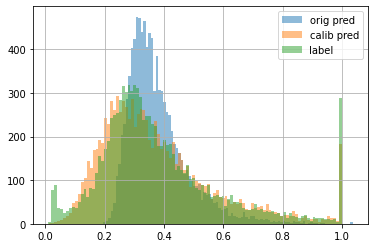

In [9]:
df = pd.read_csv('ens_exp4.csv')
df['loss'] = (df['pred'] - df['norm_score']) ** 2
print(np.sqrt(df['loss'].mean()))
df['pred'].hist(bins=100, alpha=0.5, label='orig pred')

df['pred'] = (df['pred'] - df['pred'].mean()) / df['pred'].std()
df['pred'] = (df['pred'] * df['norm_score'].std()) + df['norm_score'].mean()
df['pred'] = df['pred'].clip(0.01, 1)
df['pred'].hist(bins=100, alpha=0.5, label='calib pred')

df['norm_score'].hist(bins=100, alpha=0.5, label='label')

df['loss'] = (df['pred'].clip(0.01, 1) - df['norm_score']) ** 2
print(np.sqrt(df['loss'].mean()))

import matplotlib.pyplot as plt
plt.legend()
#m = df['pred'].mean()
#df['pred'] -= m
#df['pred'] = np.where(df['pred'] > df['pred'].quantile(1 - 0.029055690072639227), 1, df['pred'])
#df['pred'] += m
#df['loss'] = (df['pred'].clip(0.01, 1) - df['norm_score']) ** 2
#print(np.sqrt(df['loss'].mean()))

In [10]:
np.sqrt(321.50305)

17.93050612782584

In [11]:
df.corr()['Pawpularity']

Subject Focus   -0.009853
Eyes            -0.006686
Face             0.008018
Near             0.001001
Action          -0.001373
Accessory        0.013287
Group            0.016469
Collage          0.001732
Human            0.003983
Occlusion        0.001979
Info            -0.004735
Blur            -0.023540
Pawpularity      1.000000
norm_score       1.000000
bins             0.999479
fold             0.000028
pred             0.492157
loss             0.159404
Name: Pawpularity, dtype: float64

<AxesSubplot:>

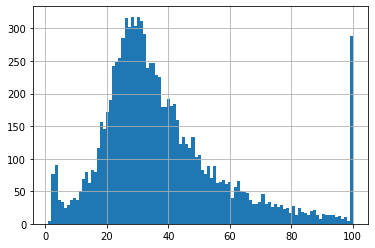

In [12]:
df['Pawpularity'].hist(bins=100)

<AxesSubplot:xlabel='Pawpularity'>

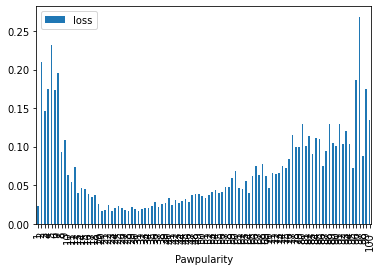

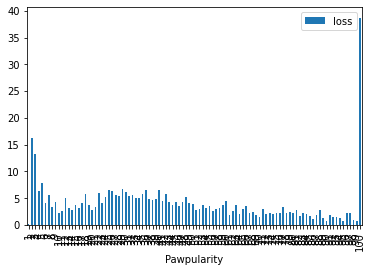

In [13]:
df.groupby('Pawpularity')[['loss']].mean().plot(kind='bar')
df.groupby('Pawpularity')[['loss']].sum().plot(kind='bar')

In [14]:
(df['Pawpularity'] == 100).mean()

0.029055690072639227

In [15]:
df.reset_index().corr()['loss']

index           -0.006309
Subject Focus    0.019256
Eyes            -0.025973
Face            -0.018834
Near             0.008557
Action          -0.004260
Accessory        0.000893
Group            0.000525
Collage          0.007749
Human            0.011669
Occlusion       -0.011295
Info             0.009076
Blur            -0.016934
Pawpularity      0.159404
norm_score       0.159404
bins             0.158565
fold             0.007180
pred             0.354108
loss             1.000000
Name: loss, dtype: float64

In [16]:
import os
[os.path.dirname(path) + '/train_cv_score.csv' for path in sorted(glob.glob('../exps/exp4_*/*_4.pth'))]

['../exps/exp4_beit_large_patch16_224/train_cv_score.csv',
 '../exps/exp4_cait_m36_384/train_cv_score.csv',
 '../exps/exp4_cait_s24_384/train_cv_score.csv',
 '../exps/exp4_cait_xs24_384/train_cv_score.csv',
 '../exps/exp4_crossvit_15_dagger_408/train_cv_score.csv',
 '../exps/exp4_crossvit_18_240/train_cv_score.csv',
 '../exps/exp4_crossvit_18_dagger_408/train_cv_score.csv',
 '../exps/exp4_crossvit_base_240/train_cv_score.csv',
 '../exps/exp4_crossvit_small_240/train_cv_score.csv',
 '../exps/exp4_pit_b_224/train_cv_score.csv',
 '../exps/exp4_xcit_large_24_p16_384_dist/train_cv_score.csv',
 '../exps/exp4_xcit_medium_24_p8_224/train_cv_score.csv',
 '../exps/exp4_xcit_medium_24_p8_224_dist/train_cv_score.csv',
 '../exps/exp4_xcit_small_24_p16_384_dist/train_cv_score.csv',
 '../exps/exp4_xcit_small_24_p8_224_dist/train_cv_score.csv',
 '../exps/exp4_xcit_small_24_p8_384_dist/train_cv_score.csv']

In [17]:
def proc(path):
    if 'exp15' in path:
        pred = pd.read_csv(path)['pred'].values
        return (np.exp(pred) / 100).clip(0, 1)
    elif 'exp9_' in path or 'exp12' in path:
        pred = np.load(path.replace('train_cv_score.csv', 'all_preds.npy'))
        return (pred.argmax(axis=1) + 1) / 100
    else:
        return pd.read_csv(path)['pred'].values.clip(0, 1)
    
tmp = {path: proc(path) for path in sorted(glob.glob('../exps/*/train_cv_score.csv')) 
       #if 'exp4' in path or
                       if 'exp7' in path or 'exp8' in path or 'exp9' in path# or 'exp10' in path #or 'exp11' in path or 'exp13' in path
                        or 'exp15' in path
                       }

tmp2 = {path: proc(path) for path in 
        {#'../exps/exp15_vit_base_patch16_224_miil_in21k/train_cv_score.csv': 0.041669382180644136,
         #'../exps/exp15_vit_large_patch16_224/train_cv_score.csv': 0.036433702767550785,
         '../exps/exp4_beit_large_patch16_224/train_cv_score.csv': 0.04157925116345851,
         '../exps/exp4_cait_s24_384/train_cv_score.csv': 0.03626225324782954,
         '../exps/exp4_cait_xs24_384/train_cv_score.csv': 0.033548283307570384,
         '../exps/exp4_crossvit_18_240/train_cv_score.csv': 0.020268622957772993,
         '../exps/exp4_crossvit_base_240/train_cv_score.csv': 0.03342541754138878,
         '../exps/exp4_crossvit_small_240/train_cv_score.csv': 0.023644372470063985,
         '../exps/exp4_xcit_large_24_p16_384_dist/train_cv_score.csv': 0.02707225235987081,
         '../exps/exp4_xcit_medium_24_p8_224/train_cv_score.csv': 0.03435188141379989,
         '../exps/exp4_xcit_medium_24_p8_224_dist/train_cv_score.csv': 0.040880336959548104,
         '../exps/exp4_xcit_small_24_p16_384_dist/train_cv_score.csv': 0.06097324647029762,
         '../exps/exp4_xcit_small_24_p8_224_dist/train_cv_score.csv': 0.026740977176253886,
         '../exps/exp4_xcit_small_24_p8_384_dist/train_cv_score.csv': 0.036393214379281544,
         #'../exps/exp7_beit_large_patch16_224/train_cv_score.csv': 0.023597631189670003,
         #'../exps/exp7_cait_m36_384/train_cv_score.csv': 0.05398382914029286,
         #'../exps/exp7_crossvit_15_dagger_408/train_cv_score.csv': 0.02226082283996187,
         #'../exps/exp7_jx_nest_base/train_cv_score.csv': 0.02909928526067165,
         #'../exps/exp7_swin_base_patch4_window12_384/train_cv_score.csv': 0.08108241179594691,
         #'../exps/exp7_swin_large_patch4_window12_384_in22k/train_cv_score.csv': 0.04432892894221474,
         #'../exps/exp7_vit_base_patch16_224_miil_in21k/train_cv_score.csv': 0.07464224384654214,
         #'../exps/exp7_vit_base_r50_s16_384/train_cv_score.csv': 0.03813415593090443,
         #'../exps/exp8_vit_base_patch16_224_miil_in21k/train_cv_score.csv': 0.0369948148648268,
         #'../exps/exp9_cait_m36_384/train_cv_score.csv': 0.037488237951416155,
         #'../exps/exp9_crossvit_18_dagger_408/train_cv_score.csv': 0.02953369828305828,
         #'../exps/exp9_crossvit_base_240/train_cv_score.csv': 0.023471591270792364
        }}

aaa = [os.path.dirname(path) + '/train_cv_score.csv' for path in sorted(glob.glob('../exps/exp4_*/*_4.pth'))]
tmp2 = {path: proc(path) for path in aaa}

tmp.update(tmp2)

'''
tmp = {path: proc(path + '/train_cv_score.csv') for path in [
                                    '../exps/exp7_vit_base_patch16_224_miil_in21k',
                                    '../exps/exp7_swin_base_patch4_window12_384',
                                    '../exps/exp7_swin_large_patch4_window12_384_in22k',
                                    '../exps/exp4_xcit_small_24_p16_384_dist',
                                    '../exps/exp7_beit_large_patch16_224',
                                    '../exps/exp4_crossvit_15_dagger_408',
                                    '../exps/exp4_crossvit_18_dagger_408',
                                    '../exps/exp4_xcit_small_24_p8_384_dist',
                                    '../exps/exp15_vit_base_patch16_224_miil_in21k',
                                    '../exps/exp4_pit_b_224',
                                    '../exps/exp8_vit_base_patch16_224_miil_in21k',
                                    '../exps/exp4_cait_m36_384',
                                    '../exps/exp7_cait_m36_384',
                                    '../exps/exp9_cait_m36_384',]}
'''


tmp = {path: proc('../exps/' + path + '/train_cv_score.csv') for path in {
    'exp7_cait_m36_384': 0.10573687177566875,
 'exp4_xcit_small_24_p16_384_dist': 0.09017084075938603,
 'exp4_crossvit_18_dagger_408': 0.0864555998708494,
 'exp4_xcit_small_24_p8_384_dist': 0.08478909740799544,
 'exp15_vit_base_patch16_224_miil_in21k': 0.08388133976905879,
 'exp7_swin_large_patch4_window12_384_in22k': 0.08162600824050978,
 'exp9_cait_m36_384': 0.07951668818830163,
 'exp7_vit_base_patch16_224_miil_in21k': 0.07448271317999128,
 'exp7_swin_base_patch4_window12_384': 0.07014647726439097,
 'exp7_jx_nest_base': 0.06841255969223342,
 'exp8_vit_base_patch16_224_miil_in21k': 0.06359775694462852,
 'exp7_vit_base_r50_s16_384': 0.061862705948120524,
 'exp15_vit_large_patch16_224': 0.0546458052004623,
 'exp20_convnext_base': None,
    'exp20_convnext_large': None,
}}

df_pred = pd.DataFrame(tmp)

#df_pred['bias'] = 1
print(df_pred.shape)
pd.options.display.max_rows = 999
df_pred.head().T

(9912, 15)


,0,1,2,3,4
exp7_cait_m36_384,0.301156,0.454472,0.386127,0.251648,0.360827
exp4_xcit_small_24_p16_384_dist,0.407569,0.436862,0.355999,0.257765,0.305387
exp4_crossvit_18_dagger_408,0.409929,0.506530,0.319334,0.269614,0.327776
exp4_xcit_small_24_p8_384_dist,0.350199,0.394726,0.294215,0.297878,0.317109
exp15_vit_base_patch16_224_miil_in21k,0.375981,0.394025,0.281597,0.285473,0.283251
exp7_swin_large_patch4_window12_384_in22k,0.349422,0.497883,0.329068,0.294316,0.340376
exp9_cait_m36_384,0.260000,0.320000,0.320000,0.260000,0.280000
exp7_vit_base_patch16_224_miil_in21k,0.354992,0.432782,0.280616,0.289171,0.306423
exp7_swin_base_patch4_window12_384,0.432363,0.565179,0.325413,0.228329,0.346652
exp7_jx_nest_base,0.364438,0.503971,0.342022,0.220678,0.282295


In [18]:
!ls ../exps/exp20*

../exps/exp20.py

../exps/exp20_convnext_base:
convnext_base_0.pth  convnext_base_3.pth  train_cv_score.csv
convnext_base_1.pth  convnext_base_4.pth
convnext_base_2.pth  hist.log

../exps/exp20_convnext_large:
_tmp.pth	      convnext_large_2.pth  hist.log
convnext_large_0.pth  convnext_large_3.pth  train_cv_score.csv
convnext_large_1.pth  convnext_large_4.pth


In [19]:
#pred = np.load('../exps/exp9_swin_base_patch4_window12_384/all_preds.npy')
#tmp = pd.DataFrame({'pred': pred.argmax(axis=1) + 1, 'label': (target * 100).astype(int)})
#tmp['ok'] = tmp['pred'] == tmp['label']
#tmp['ok'].mean()
#np.sqrt(((tmp['pred'] - tmp['label']) ** 2).mean())
#tmp.groupby('label')[['ok']].mean().sort_values('ok')

In [20]:
#df_pred2 = df_pred.copy()
#df_pred2['Pawpularity'] = pd.read_csv('../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv')['Pawpularity'].values
#df_pred2['Id'] = pd.read_csv('../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv')['path'].values
#df_pred2['Id'] = df_pred2['Id'].map(lambda x: x.split('/')[-1][:-4])
#df_pred2 = df_pred2[['Id', 'Pawpularity'] + df_pred.columns.values.tolist()]
#df_pred2.sort_values('Id').to_csv('cv_prediction.csv', index=False)

In [21]:
#df_pred2['Id'].map(lambda x: x.split('/')[-1][:-4])

In [22]:
target = pd.read_csv('../exps/exp8_beit_base_patch16_224_in22k/train_cv_score.csv')['norm_score'].values
pd.Series({col: np.sqrt(((df_pred[col] - target) ** 2).mean()) * 100 for col in df_pred}).sort_values().to_frame('rmse')

,rmse
exp7_cait_m36_384,17.661636
exp7_swin_large_patch4_window12_384_in22k,17.687250
exp20_convnext_large,17.741086
exp7_vit_base_patch16_224_miil_in21k,17.772114
exp20_convnext_base,17.823614
exp4_xcit_small_24_p16_384_dist,17.861272
exp7_swin_base_patch4_window12_384,17.864037
exp7_jx_nest_base,17.880826
exp4_crossvit_18_dagger_408,17.893266
exp4_xcit_small_24_p8_384_dist,17.953217


array([[<AxesSubplot:title={'center':'norm_score'}>,
        <AxesSubplot:title={'center':'pred'}>]], dtype=object)

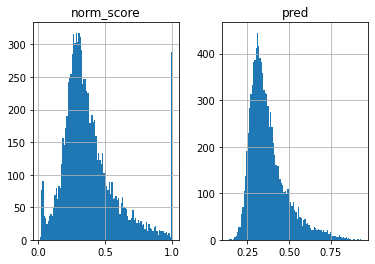

In [23]:
df = pd.read_csv('../exps/exp1_swin_base_patch4_window12_384/train_cv_score.csv')
df[['norm_score', 'pred']].hist(bins=100)

In [24]:
df['Pawpularity'].mean(), df['Pawpularity'].var()

(38.03904358353511, 424.030056516317)

In [25]:
#print(train_df_prev.shape)
#train_df_prev = train_df_prev[train_df_prev['path'].isin(np.load('train_df_prev_path.npy'))]
#print(train_df_prev.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

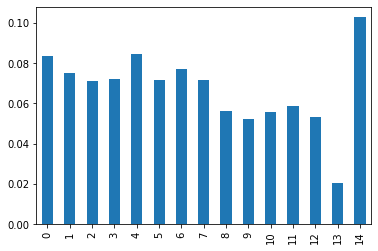

In [26]:
coef = np.linalg.lstsq(df_pred.values, target)[0]
pd.Series(coef).plot(kind='bar')

In [27]:
pd.options.display.max_rows = 999
pd.Series(coef, index=df_pred.columns.values).sort_values(ascending=False).to_frame('coef')
#coef

,coef
exp20_convnext_large,0.102893
exp15_vit_base_patch16_224_miil_in21k,0.084460
exp7_cait_m36_384,0.083736
exp9_cait_m36_384,0.076852
exp4_xcit_small_24_p16_384_dist,0.074807
exp4_xcit_small_24_p8_384_dist,0.072112
exp7_vit_base_patch16_224_miil_in21k,0.071608
exp7_swin_large_patch4_window12_384_in22k,0.071521
exp4_crossvit_18_dagger_408,0.071037
exp7_vit_base_r50_s16_384,0.058498


In [28]:
df_pred2 = df_pred.copy()

for i in range(200):
    coef = np.linalg.lstsq(df_pred2.values, target)[0]
    cols = df_pred2.columns[np.argsort(coef)][1:]
    if min(coef) > 0.05:
        break
    df_pred2 = df_pred2[cols]
    #print(df_pred2.shape)
coef, coef.sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


(array([0.05555433, 0.05460188, 0.05634504, 0.05739068, 0.05860054,
        0.07255285, 0.0721025 , 0.07195491, 0.07345537, 0.07615824,
        0.07699896, 0.08676664, 0.08459694, 0.10757345]),
 1.0046523114136765)

In [29]:
np.sqrt(((np.dot(df_pred2, coef) - target) ** 2).mean())

0.17213361474052205

In [30]:
df_pred2

,exp7_jx_nest_base,exp15_vit_large_patch16_224,exp8_vit_base_patch16_224_miil_in21k,exp7_swin_base_patch4_window12_384,exp7_vit_base_r50_s16_384,exp4_crossvit_18_dagger_408,exp7_swin_large_patch4_window12_384_in22k,exp7_vit_base_patch16_224_miil_in21k,exp4_xcit_small_24_p8_384_dist,exp4_xcit_small_24_p16_384_dist,exp9_cait_m36_384,exp7_cait_m36_384,exp15_vit_base_patch16_224_miil_in21k,exp20_convnext_large
0,0.364438,0.381902,0.383789,0.432363,0.300438,0.409929,0.349422,0.354992,0.350199,0.407569,0.26,0.301156,0.375981,0.334807
1,0.503971,0.401796,0.331299,0.565179,0.423398,0.506530,0.497883,0.432782,0.394726,0.436862,0.32,0.454472,0.394025,0.439537
2,0.342022,0.329863,0.345703,0.325413,0.277963,0.319334,0.329068,0.280616,0.294215,0.355999,0.32,0.386127,0.281597,0.395134
3,0.220678,0.283251,0.219849,0.228329,0.285671,0.269614,0.294316,0.289171,0.297878,0.257765,0.26,0.251648,0.285473,0.227985
4,0.282295,0.358063,0.354980,0.346652,0.308919,0.327776,0.340376,0.306423,0.317109,0.305387,0.28,0.360827,0.283251,0.299208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,0.445650,0.378930,0.370605,0.408690,0.377828,0.360939,0.402333,0.427636,0.451206,0.458409,0.35,0.351200,0.431907,0.481957
9908,0.519735,0.567731,0.447266,0.521212,0.563078,0.532729,0.534370,0.530115,0.468517,0.510756,1.00,0.452113,0.480887,0.489938
9909,0.359589,0.270809,0.296143,0.218003,0.349977,0.283781,0.204342,0.255901,0.393502,0.344443,0.30,0.265499,0.275073,0.299925
9910,0.387459,0.467003,0.398193,0.370453,0.403684,0.352648,0.310694,0.359027,0.369656,0.418103,0.30,0.387053,0.428546,0.390011


In [31]:
!pip install cvxopt

In [46]:
from cvxopt import matrix, solvers
df_pred2 = df_pred.copy()
for i in range(200):
    Q = np.dot(df_pred2.T, df_pred2)
    q = - np.dot(target, df_pred2)
    G = - np.eye(Q.shape[0])
    h = np.zeros(Q.shape[0])
    sol = solvers.qp(matrix(Q), matrix(q), matrix(G), matrix(h))

    coef = np.array(sol['x'])[:, 0]
    cols = df_pred2.columns[np.argsort(coef)][1:]
    if min(coef) > 0.05:
        break
    df_pred2 = df_pred2[cols]
    print(df_pred2.shape)
    


     pcost       dcost       gap    pres   dres
 0: -7.8040e+02 -7.8144e+02  1e+00  0e+00  7e-04
 1: -7.8040e+02 -7.8042e+02  2e-02  5e-17  1e-05
 2: -7.8040e+02 -7.8040e+02  2e-04  6e-17  1e-07
 3: -7.8040e+02 -7.8040e+02  2e-06  5e-17  1e-09
Optimal solution found.
(9912, 14)
     pcost       dcost       gap    pres   dres
 0: -7.8040e+02 -7.8144e+02  1e+00  0e+00  7e-04
 1: -7.8040e+02 -7.8041e+02  1e-02  4e-17  1e-05
 2: -7.8040e+02 -7.8040e+02  1e-04  3e-17  1e-07
Optimal solution found.


<AxesSubplot:>

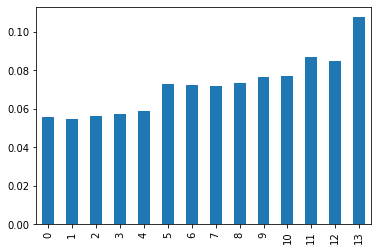

In [47]:
pd.Series(np.array(sol['x'])[:, 0]).plot(kind='bar')

In [54]:
#df['pred'] = np.dot(df_pred2, coef)
#df.to_csv('ens_exp20.csv', index=False)

In [49]:
!ls ../exps/exp4_xcit_small_24_p8_384_dist/

hist.log			 xcit_small_24_p8_384_dist_2.pth
train_cv_score.csv		 xcit_small_24_p8_384_dist_3.pth
xcit_small_24_p8_384_dist_0.pth  xcit_small_24_p8_384_dist_4.pth
xcit_small_24_p8_384_dist_1.pth


In [50]:
!ls ../exps/exp9_crossvit_base_240

all_preds.npy		 crossvit_base_240_2.pth  hist.log
crossvit_base_240_0.pth  crossvit_base_240_3.pth  train_cv_score.csv
crossvit_base_240_1.pth  crossvit_base_240_4.pth


In [51]:
res = pd.DataFrame({'col': df_pred2.columns, 'coef': coef}).sort_values('coef', ascending=False)
res
res.set_index('col')['coef'].sort_index().to_dict()

{'exp15_vit_base_patch16_224_miil_in21k': 0.08459557519051042,
 'exp15_vit_large_patch16_224': 0.054602278608471444,
 'exp20_convnext_large': 0.10757113794966554,
 'exp4_crossvit_18_dagger_408': 0.07255291221705243,
 'exp4_xcit_small_24_p16_384_dist': 0.07615822693896708,
 'exp4_xcit_small_24_p8_384_dist': 0.07345531269210354,
 'exp7_cait_m36_384': 0.08676476831055598,
 'exp7_jx_nest_base': 0.05555615759973762,
 'exp7_swin_base_patch4_window12_384': 0.0573931578726199,
 'exp7_swin_large_patch4_window12_384_in22k': 0.07210228959069125,
 'exp7_vit_base_patch16_224_miil_in21k': 0.07195345528468275,
 'exp7_vit_base_r50_s16_384': 0.058601333331186556,
 'exp8_vit_base_patch16_224_miil_in21k': 0.05634679166402379,
 'exp9_cait_m36_384': 0.0769990055041272}

In [53]:
res

,col,coef
13,exp20_convnext_large,0.107571
11,exp7_cait_m36_384,0.086765
12,exp15_vit_base_patch16_224_miil_in21k,0.084596
10,exp9_cait_m36_384,0.076999
9,exp4_xcit_small_24_p16_384_dist,0.076158
8,exp4_xcit_small_24_p8_384_dist,0.073455
5,exp4_crossvit_18_dagger_408,0.072553
6,exp7_swin_large_patch4_window12_384_in22k,0.072102
7,exp7_vit_base_patch16_224_miil_in21k,0.071953
4,exp7_vit_base_r50_s16_384,0.058601


In [39]:
for path in res['col'].sort_values().values:
    if 1:#not 'exp7' in path and not 'exp4' in path and not 'exp9' in path:
        print('gsutil -m cp -r', os.path.dirname(path), 'gs://takami-kaggle-12/pet/')

gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/
gsutil -m cp -r  gs://takami-kaggle-12/pet/


In [40]:
res.col.sort_values().values.tolist()

['exp15_vit_base_patch16_224_miil_in21k',
 'exp15_vit_large_patch16_224',
 'exp20_convnext_base',
 'exp20_convnext_large',
 'exp4_crossvit_18_dagger_408',
 'exp4_xcit_small_24_p16_384_dist',
 'exp4_xcit_small_24_p8_384_dist',
 'exp7_cait_m36_384',
 'exp7_jx_nest_base',
 'exp7_swin_base_patch4_window12_384',
 'exp7_swin_large_patch4_window12_384_in22k',
 'exp7_vit_base_patch16_224_miil_in21k',
 'exp7_vit_base_r50_s16_384',
 'exp8_vit_base_patch16_224_miil_in21k',
 'exp9_cait_m36_384']

In [41]:
print('\n'.join(sorted([c[8:].split('/')[0] for c in res['col'].values.tolist()])))

_base_patch16_224_miil_in21k
_base_patch16_224_miil_in21k
_base_r50_s16_384
n_base_patch4_window12_384
n_large_patch4_window12_384_in22k
nest_base
nvnext_base
nvnext_large
ssvit_18_dagger_408
t_base_patch16_224_miil_in21k
t_large_patch16_224
t_m36_384
t_m36_384
t_small_24_p16_384_dist
t_small_24_p8_384_dist


In [42]:
pred = np.dot(df_pred2, coef)
#pred = pred - pred.mean() + 0.3803904358353526
np.sqrt(((pred - target) ** 2).mean())

0.17213125104274188

In [43]:
pred = np.dot(df_pred2, coef)
pred = pred - pred.mean() + 0.3803904358353526
pred = pred.clip(0.01, 1)
np.sqrt(((pred - target) ** 2).mean())

0.17211686757035963

In [44]:
[(np.nan, 0.17271177601929089)]

[(nan, 0.17271177601929089)]

In [45]:
aaa = []
i = np.nan
for i in np.linspace(0, 0.5, 100):
pred = np.dot(df_pred2, coef)
mu = pred.mean()
pred = (pred - mu)
pred = np.where(pred > 0, pred * 1.1, pred * 1.12) + 0.3803904358353526
pred = pred.clip(0.01, 1)
aaa.append((i, np.sqrt(((pred - target) ** 2).mean())))

sorted(aaa, key=lambda x: x[1])

IndentationError: expected an indented block (1107677758.py, line 4)

In [ ]:
_pred = np.dot(df_pred2, coef)
def score(mu, sigma):
    pred = _pred * sigma - mu
    pred = pred.clip(0.01, 1)
    return np.sqrt(((pred - target) ** 2).mean())

aaa = [((m, s), score(m, s)) for m in np.linspace(0, 0.5, 100) for s in np.linspace(0.5, 1.5, 100)]

In [ ]:
#sorted(aaa, key=lambda x: x[1])

In [ ]:
pred = np.dot(df_pred2, coef)
for i in range(100):
    pred = pred / pred.mean() * 0.3803904358353526
    pred = pred.clip(0.01, 1)
np.sqrt(((pred - target) ** 2).mean())

In [ ]:
pred = np.dot(df_pred2, coef)
for i in range(100):
    pred = pred - pred.mean() + 0.3803904358353526
    pred = pred.clip(0.01, 1)
np.sqrt(((pred - target) ** 2).mean())

In [ ]:
0.17139471886213498

In [ ]:
pred = np.dot(df_pred2, coef)
pred = (pred - pred.mean()) / pred.std()
pred = pred * (target.std()) + 0.3803904358353526
pred = pred.clip(0.01, 1)
np.sqrt(((pred - target) ** 2).mean())

In [ ]:
np.corrcoef(np.dot(df_pred2, coef), target)

In [ ]:
res.set_index('col')['coef'].to_dict()

In [ ]:
res.set_index('col')['coef'].sum()

In [ ]:
df['pred'] = np.dot(df_pred2, coef)
#df.to_csv('ens_exp9.csv', index=False)

In [ ]:
df